In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
dt = pd.read_csv("./Car details v3.csv")

In [44]:
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [45]:
dt.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [46]:
# checking NAs
dt[dt.isna()==True]
# All are NA, dropping NA

dt.dropna(inplace=True)

In [47]:
dt.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [48]:
print(dt.shape)
print(dt.nunique())
print(dt.dtypes)

(7906, 13)
name             1982
year               27
selling_price     670
km_driven         898
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
dtype: int64
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


In [49]:
## covert mileage, engine and power to numeric

dt.mileage = dt.mileage.str.extract('(\d+)')
dt.engine = dt.engine.str.extract('(\d+)')
dt.max_power = dt.max_power.str.extract('(\d+)')

In [50]:
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,"11.5@ 4,500(kgm@ rpm)",5.0


In [51]:
## Extracting brand from Name
dt["Brand"] = dt.name.str.split().str[0]

In [52]:
## Calculating age of car
dt['age'] = 2022-dt['year']

In [53]:
## Dropiing some variables
dt.drop(columns=['name','torque','year'],axis=1,inplace=True)

In [54]:
dt.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,5.0,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5.0,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,5.0,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5.0,Maruti,15


In [30]:
dt.dtypes

## covert mileage, engine and max_power
dt.mileage = dt.mileage.astype(float)
dt.engine = dt.engine.astype(float)
dt.max_power  = dt.max_power.astype(float)

In [31]:
dt.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
Brand             object
age                int64
dtype: object

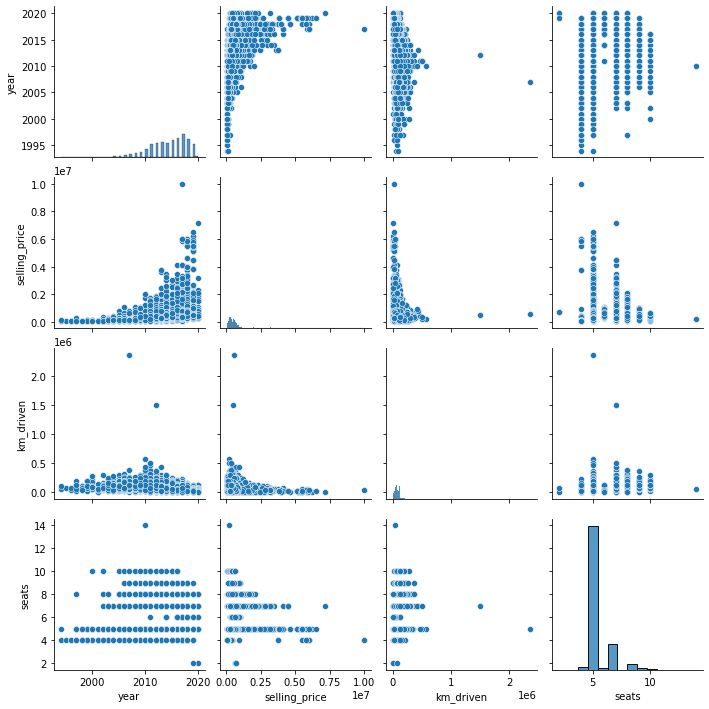

In [16]:
## Performing EDA
sns.pairplot(dt)

<AxesSubplot:>

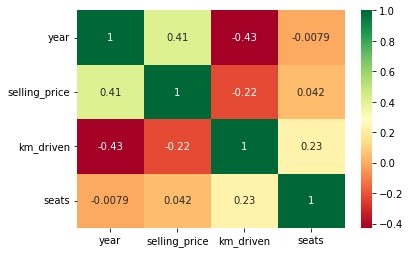

In [17]:
sns.heatmap(dt.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

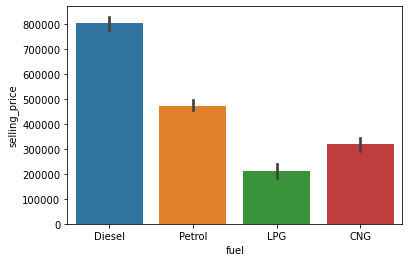

In [18]:
sns.barplot(x=dt.fuel,y=dt.selling_price)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

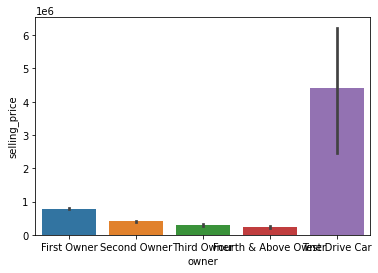

In [19]:
sns.barplot(x=dt.owner,y=dt.selling_price)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

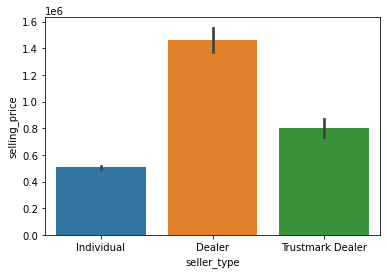

In [20]:
sns.barplot(x=dt.seller_type,y=dt.selling_price)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

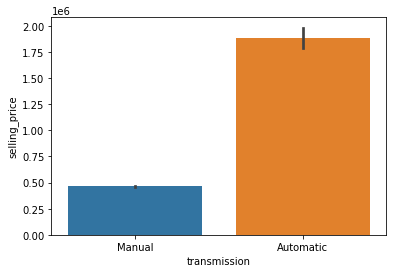

In [21]:
sns.barplot(x=dt.transmission,y=dt.selling_price)

<AxesSubplot:xlabel='selling_price', ylabel='Brand'>

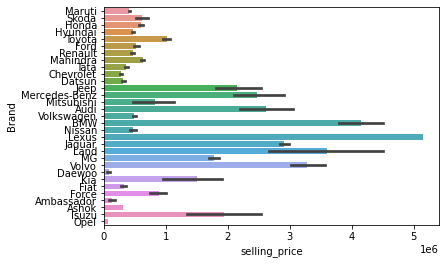

In [33]:
sns.barplot(x=dt.selling_price,y=dt.Brand,orient='h')

In [66]:
## Dropping Brand , its too many 
dt.drop(columns=['Brand'],inplace=True)

In [67]:
dt.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0,15


In [36]:
## Converting categories into numeric
dt = pd.get_dummies(dt,columns=['fuel','seller_type','transmission','owner'],drop_first=True)

In [38]:
## Train Test Split
Y = dt['selling_price']
X = dt.drop(columns=['selling_price'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [30]:
pred = rf_model.predict(X_test)

C:\Users\haris\anaconda3\envs\CarPricePrediciton\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

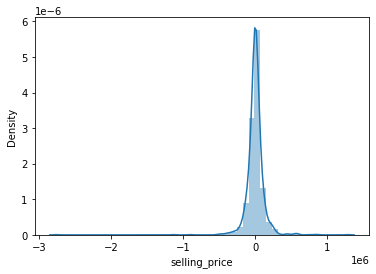

In [31]:
## Model Validation
## checking distribution of errors

sns.distplot(pred-Y_test)
# errors are normally distributed around Zero, hence good fit.

In [32]:
metrics.r2_score(Y_test,pred)

0.9719252566364571

C:\Users\haris\anaconda3\envs\CarPricePrediciton\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

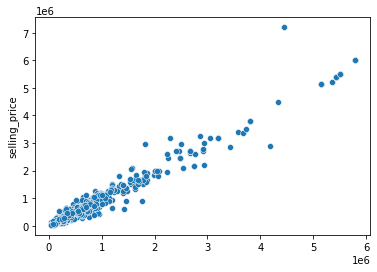

In [33]:
sns.scatterplot(pred,Y_test)

In [34]:
## Model Optimization
## Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of Features to consider at every split
max_features = ['auto','sqrt']

# Maximum numbers of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Minimum no. of samples required to split the node
min_samples_split = [2,5,10,15,100]

# Minimum no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                              n_iter= 10, cv=5,verbose=2,random_state= 42,n_jobs=-1)

In [43]:
#rf_random.fit(X_train,Y_train)

In [45]:
#pred_final = rf_random.predict(X_test)

In [105]:
#metrics.r2_score(Y_test,pred_final)

## default model performed good, going with default model

0.9398593554527419

In [36]:
## storing for deployment

file = open('CarPricePrediction_rf.pkl','wb')
import pickle
pickle.dump(rf_model,file)
file.close()

In [13]:
dt.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [37]:
dt.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,18.981027,1458.708829,91.271060,5.416393,8.016064,0.543764,0.004427,0.445231,0.830129,0.029851,0.868328,0.020238,0.254996,0.000632,0.064508
std,8.135827e+05,5.679230e+04,4.064364,503.893057,35.732781,0.959208,3.863695,0.498113,0.066393,0.497023,0.375543,0.170186,0.338155,0.140822,0.435887,0.025142,0.245671
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+05,3.500000e+04,16.000000,1197.000000,68.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,5.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.900000e+05,9.542500e+04,22.000000,1582.000000,102.000000,5.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X_train

,km_driven,mileage,engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3410,45000,19.0,1999.0,177.0,5.0,5,1,0,0,0,0,0,0,0,0,0
4747,8576,18.0,1199.0,88.0,5.0,4,0,0,1,0,0,1,0,0,0,0
2310,80000,20.0,1197.0,78.0,5.0,13,0,0,1,1,0,1,0,1,0,0
6386,80000,23.0,1248.0,73.0,5.0,10,1,0,0,1,0,1,0,0,0,1
2655,70000,18.0,1197.0,81.0,5.0,2,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,65000,17.0,1086.0,62.0,5.0,12,0,0,1,1,0,1,0,1,0,0
2488,110000,11.0,2953.0,153.0,7.0,10,1,0,0,1,0,0,0,0,0,0
5554,100000,26.0,1248.0,74.0,5.0,7,1,0,0,1,0,1,0,0,0,0
5009,44000,16.0,1298.0,88.0,5.0,16,0,0,1,1,0,1,0,1,0,0


In [56]:
## Data flow for deployement
dt.head()
dt.drop(columns=['selling_price'])
dt.mileage = dt.mileage.astype(float)
dt.engine = dt.engine.astype(float)
dt.max_power  = dt.max_power.astype(float)
dt.to_csv("./AppData.csv")

In [64]:
dt1 = dt.tail(1)

In [68]:
dt.to_csv("./AppData.csv")